In [461]:
%matplotlib inline 

import sys
import csv
import pandas as pd              # data package
import matplotlib.pyplot as plt  # graphics 
import matplotlib.cm as cm
import os                        # operating system tools (check files)
import requests, io              # internet and input tools  
import numpy as np               # data package

#### Specify countries to compare:

In [462]:
country_comps = ['China','United States','United Kingdom','France','Germany','Canada','Australia','Italy']

#### Read CSV file:

In [463]:
expenditure_GDP = pd.read_csv('/Users/BenTeoh/data_bootcamp_jupyter/project/health_expenditure_%GDP.csv', 
                      engine='python',         # set engine to python
                      encoding="ISO-8859-1",   # avoid utf-8 encoding errors
                      quoting=csv.QUOTE_NONE,  # fix ParserError: EOF character
                      index_col=False,         # align all left with no index column
                      skiprows=None,           
                      error_bad_lines=False)   # don't generate error if bad lines)

#### Drop unnecessary columns:

In [464]:
expenditure_GDP = expenditure_GDP.drop(labels='Series Name', axis=1)
expenditure_GDP = expenditure_GDP.drop(labels='Series Code', axis=1)
expenditure_GDP = expenditure_GDP.drop(labels='Country Code', axis=1)

In [465]:
expenditure_GDP.dtypes

Region Type     object
Country Name    object
2000            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
dtype: object

#### Drop null values:

In [466]:
expenditure_GDP = expenditure_GDP.dropna(axis=0,how='any')

#### Strip '%' sign:

In [467]:
expenditure_GDP['2000'] = expenditure_GDP['2000'].str.replace('%','').str.strip().astype(float)
expenditure_GDP['2008'] = expenditure_GDP['2008'].str.replace('%','').str.strip().astype(float)
expenditure_GDP['2009'] = expenditure_GDP['2009'].str.replace('%','').str.strip().astype(float)
expenditure_GDP['2010'] = expenditure_GDP['2010'].str.replace('%','').str.strip().astype(float)
expenditure_GDP['2011'] = expenditure_GDP['2011'].str.replace('%','').str.strip().astype(float)
expenditure_GDP['2012'] = expenditure_GDP['2012'].str.replace('%','').str.strip().astype(float)
expenditure_GDP['2013'] = expenditure_GDP['2013'].str.replace('%','').str.strip().astype(float)
expenditure_GDP['2014'] = expenditure_GDP['2014'].str.replace('%','').str.strip().astype(float)
expenditure_GDP['2015'] = expenditure_GDP['2015'].str.replace('%','').str.strip().astype(float)

#### Take only country_comps:

In [468]:
expenditure_GDP_comps = expenditure_GDP[expenditure_GDP['Country Name'].isin(country_comps)]
expenditure_GDP_comps

,Region Type,Country Name,2000,2008,2009,2010,2011,2012,2013,2014,2015
11,Country,United States,12.5,15.3,16.3,16.4,16.4,16.4,16.3,16.5,16.8
19,Country,Germany,9.8,10.2,11.2,11.0,10.7,10.8,11.0,11.1,11.2
20,Country,France,9.5,10.1,10.8,10.7,10.7,10.8,10.9,11.1,11.1
26,Country,Canada,8.3,9.5,10.6,10.6,10.2,10.2,10.1,10.0,10.4
32,Country,United Kingdom,6.0,7.7,8.6,8.5,8.5,8.5,9.9,9.8,9.9
36,Country,Australia,7.6,8.3,8.6,8.5,8.6,8.7,8.8,9.1,9.4
43,Country,Italy,7.6,8.6,9.0,9.0,8.8,9.0,9.0,9.0,9.0
146,Country,China,4.5,4.3,4.6,4.5,4.6,4.8,4.9,5.0,5.3


In [469]:
expenditure_GDP_comps = expenditure_GDP_comps.sort_values('Country Name')

#### Format dataframe for plot:

In [470]:
expenditure_GDP_comps = expenditure_GDP_comps.drop('Region Type',axis=1)
expenditure_GDP_comps = expenditure_GDP_comps.transpose()
expenditure_GDP_comps.columns = expenditure_GDP_comps.iloc[0]
expenditure_GDP_comps = expenditure_GDP_comps.drop('Country Name')
expenditure_GDP_comps

Country Name,Australia,Canada,China,France,Germany,Italy,United Kingdom,United States
2000,7.6,8.3,4.5,9.5,9.8,7.6,6,12.5
2008,8.3,9.5,4.3,10.1,10.2,8.6,7.7,15.3
2009,8.6,10.6,4.6,10.8,11.2,9,8.6,16.3
2010,8.5,10.6,4.5,10.7,11,9,8.5,16.4
2011,8.6,10.2,4.6,10.7,10.7,8.8,8.5,16.4
2012,8.7,10.2,4.8,10.8,10.8,9,8.5,16.4
2013,8.8,10.1,4.9,10.9,11,9,9.9,16.3
2014,9.1,10,5,11.1,11.1,9,9.8,16.5
2015,9.4,10.4,5.3,11.1,11.2,9,9.9,16.8


#### Plot 1:

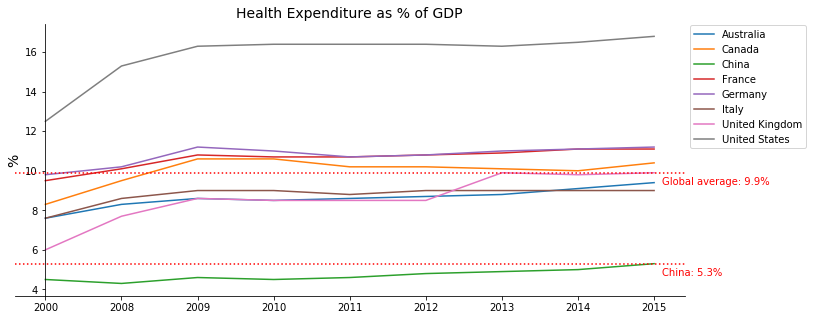

In [471]:
fig, ax = plt.subplots()

expenditure_GDP_comps.plot(figsize=(12,5),kind='line',ax=ax,use_index=False)
ax.set_title('Health Expenditure as % of GDP',loc='center',fontsize='14')
ax.set_ylabel('%',fontsize=14)
ax.set_xticklabels(('','2000','2008','2009','2010','2011','2012','2013','2014','2015'))
ax.spines['left'].set_position(('outward',-30))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.text(8.1,4.7, 'China: 5.3%',color='r')
ax.text(8.1,9.3, 'Global average: 9.9%',color='r')
ax.axhline(y=9.9,color='r',linestyle='dotted')
ax.axhline(y=5.3,color='r',linestyle='dotted')
ax.legend(bbox_to_anchor=(.9, .89),
           bbox_transform=plt.gcf().transFigure)

#### Read CSV file:

In [472]:
expenditure_per_capita = pd.read_csv('/Users/BenTeoh/data_bootcamp_jupyter/project/expenditure_per_capita.csv', 
                      engine='python',         # set engine to python
                      encoding="ISO-8859-1",   # avoid utf-8 encoding errors
                      quoting=csv.QUOTE_NONE,  # fix ParserError: EOF character
                      index_col=False,         # align all left with no index column
                      skiprows=None,           
                      error_bad_lines=False)   # don't generate error if bad lines)

#### Drop unnecessary columns:

In [473]:
expenditure_per_capita = expenditure_per_capita.drop(labels='Series Name', axis=1)
expenditure_per_capita = expenditure_per_capita.drop(labels='Series Code', axis=1)
expenditure_per_capita = expenditure_per_capita.drop(labels='Country Code', axis=1)

#### Drop null values:

In [474]:
expenditure_per_capita = expenditure_per_capita.dropna(axis=0,how='any')

#### Drop all rows with 'n.a.':

In [475]:
expenditure_per_capita[~expenditure_per_capita['2000'].str.contains("na")]

,Country Name,2000,2008,2009,2010,2011,2012,2013,2014,2015
1,Albania,75.53148121,240.3826174,207.4278117,204.2131372,248.1725872,247.2666907,277.668927,314.8626291,265.9032358
2,Algeria,61.30289032,206.1130504,207.3460211,228.3995436,286.1519858,333.9365052,330.2233721,357.8989427,291.6358976
3,Andorra,2050.647532,4985.571324,4721.917605,4595.714195,4860.494964,4641.601703,5751.403028,5088.212878,4315.698309
4,Angola,13.90328266,135.3760686,120.0043941,96.7489729,122.2268767,122.4809396,143.78773,131.8420075,108.5595355
5,Antigua and Barbuda,381.0759458,676.5716605,617.8466252,672.8001332,683.5599991,640.2096236,655.5258041,731.5028173,657.1726896
6,Argentina,418.3976917,567.3280104,576.8111814,698.6034956,806.8599495,864.5053541,920.8128795,845.0546874,997.9313753
7,Armenia,40.51081708,174.305846,140.3821745,169.421455,133.2231376,247.3189262,317.8587381,281.2887287,366.0492478
8,Australia,1632.420025,4088.804277,3997.509689,4952.776147,5876.878483,6047.020069,5838.389894,5637.559721,4934.047418
9,Austria,2263.490457,4959.176132,4837.652483,4724.738463,5076.308908,4909.029565,5161.215403,5300.55248,4536.077437
10,Azerbaijan,24.90492372,221.5992394,267.5966005,287.408308,345.4428737,383.7740866,423.4278918,447.3372334,368.3393527


#### Format dataframe for plot:

In [476]:
expenditure_per_capita_comps = expenditure_per_capita[expenditure_per_capita['Country Name'].isin(country_comps)]
expenditure_per_capita_comps = expenditure_per_capita_comps.transpose()
expenditure_per_capita_comps.columns = expenditure_per_capita_comps.iloc[0]
expenditure_per_capita_comps = expenditure_per_capita_comps.drop('Country Name')

In [477]:
expenditure_per_capita_comps

Country Name,Australia,Canada,China,France,Germany,Italy,United Kingdom,United States
2000,1632.420025,1998.634433,42.50947428,2156.483253,2355.46583,1520.453642,1672.524962,4561.913352
2008,4088.804277,4389.263347,145.7791784,4614.26543,4730.123037,3489.985726,3615.617554,7420.067319
2009,3997.509689,4290.851273,174.3856541,4523.594551,4742.252717,3324.37362,3272.640546,7696.47151
2010,4952.776147,4987.548682,198.8747881,4385.429864,4696.737702,3214.546282,3306.786792,7949.89613
2011,5876.878483,5292.441914,254.0919521,4725.351304,5030.805251,3387.575618,3501.483299,8160.844865
2012,6047.020069,5343.61216,298.7089571,4447.746434,4761.253315,3125.611468,3532.055053,8432.506528
2013,5838.389894,5286.740903,339.0608085,4679.11465,5103.486548,3195.553285,4193.71878,8634.631747
2014,5637.559721,5028.982333,376.1940122,4779.179428,5293.384484,3190.088143,4566.65015,9059.521156
2015,4934.047418,4507.550519,425.6332942,4026.147179,4591.846096,2700.4258,4355.805764,9535.945335


#### Plot 2:

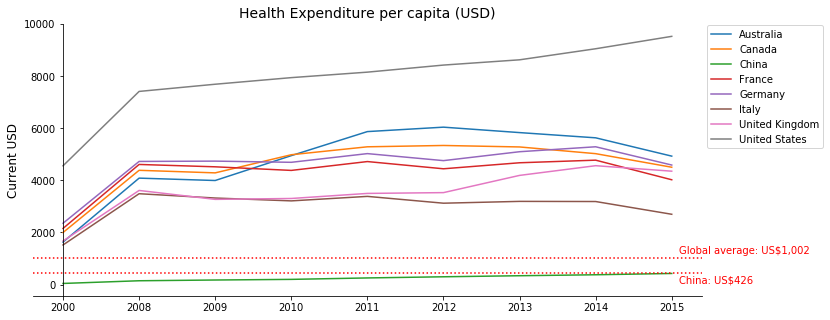

In [478]:
fig, ax = plt.subplots()

expenditure_per_capita_comps = expenditure_per_capita_comps.astype(float)
expenditure_per_capita_comps.plot(figsize=(12,5),kind='line',ax=ax,use_index=False)
ax.set_title('Health Expenditure per capita (USD)',loc='center',fontsize='14')
ax.set_ylabel('Current USD',fontsize=12)
# ax.xticks(ticks=None,labels=['2000','2008','2009','2010','2011','2012','2013','2014','2015'])
# ax.tick_params(
#     axis='x',               # changes apply to the x-axis
#     which='both',           # both major and minor ticks are affected
#     bottom=False,           # ticks along the bottom edge are off
#     top=False,              # ticks along the top edge are off
#     labelbottom=True)       # turn off axis labels
ax.set_xticklabels(('','2000','2008','2009','2010','2011','2012','2013','2014','2015'))
ax.spines['left'].set_position(('outward',-30))
# ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.text(8.1,35, 'China: US$426',color='r')
ax.text(8.1,1200, 'Global average: US$1,002',color='r')
ax.axhline(y=425,color='r',linestyle='dotted')
ax.axhline(y=1001,color='r',linestyle='dotted')

ax.legend(bbox_to_anchor=(.9, .89),
           bbox_transform=plt.gcf().transFigure)

#### Read CSV file:

In [479]:
risk_impov = pd.read_csv('/Users/BenTeoh/data_bootcamp_jupyter/project/risk_impov.csv', 
                      engine='python',         # set engine to python
                      encoding="ISO-8859-1",   # avoid utf-8 encoding errors
                      quoting=csv.QUOTE_NONE,  # fix ParserError: EOF character
                      index_col=False,         # align all left with no index column
                      skiprows=None,           
                      error_bad_lines=False)   # don't generate error if bad lines)

#### Drop null values:

In [480]:
risk_impov = risk_impov.dropna(axis=0,how='any')

In [481]:
risk_impov = risk_impov.sort_values('Country Name')
risk_impov

,Country Name,Country Code,Series Name,Series Code,2008,2009,2010,2011,2012,2013,2014,2015
118,Albania,ALB,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,1.300000,1.200000,1.200000,1.000000,0.800000,0.900000,0.900000,0.800000
98,Algeria,DZA,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,16.900000,16.600000,15.400000,6.700000,7.000000,6.000000,5.500000,5.800000
93,Angola,AGO,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,25.300000,16.800000,16.800000,17.600000,17.400000,14.800000,13.700000,8.300000
104,Argentina,ARG,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,6.400000,6.100000,4.900000,3.900000,3.200000,3.100000,3.800000,3.400000
97,Armenia,ARM,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,4.300000,3.300000,4.700000,3.200000,3.300000,4.000000,4.900000,7.000000
138,Australia,AUS,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000
139,Austria,AUT,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21,Bangladesh,BGD,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,72.900000,71.400000,69.600000,67.100000,65.500000,63.900000,63.100000,59.500000
121,Belarus,BLR,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,1.600000,1.600000,1.400000,1.000000,0.600000,0.500000,0.600000,0.500000
140,Belgium,BEL,Risk of impoverishing expenditure for surgical...,SH.SGR.IRSK.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [482]:
risk_impov_mrg = risk_impov.drop(labels=['Series Name','Series Code','Country Code','2008','2009','2010','2011','2012','2013','2014'], axis=1)
expenditure_GDP_mrg = expenditure_GDP.drop(labels=['2000','2008','2009','2010','2011','2012','2013','2014'],axis=1)

#### Merge dataframes:

In [483]:
combo_risk = pd.merge(risk_impov_mrg,expenditure_GDP_mrg,
                 on='Country Name',
                 how='inner')
combo_risk = combo_risk[~combo_risk['Region Type'].isin(['World','Region','Category'])]
combo_risk = combo_risk.drop(labels=['Region Type'],
                   axis=1)
combo_risk = combo_risk[['Country Name','2015_x','2015_y']]
combo_risk.rename(columns={'2015_x': 'risk_impov','2015_y':'expenditure_GDP'}, 
                     inplace=True)

In [484]:
combo_risk

,Country Name,risk_impov,expenditure_GDP
0,Albania,0.800000,6.8
1,Algeria,5.800000,7.1
2,Angola,8.300000,2.9
3,Argentina,3.400000,6.8
4,Armenia,7.000000,10.1
5,Australia,0.000000,9.4
6,Austria,0.000000,10.3
7,Bangladesh,59.500000,2.6
8,Belarus,0.500000,6.1
9,Belgium,0.000000,10.5


#### Read CSV file:

In [485]:
life_expec = pd.read_csv('/Users/BenTeoh/data_bootcamp_jupyter/project/life_expectancy.csv', 
                      engine='python',         # set engine to python
                      encoding="ISO-8859-1",   # avoid utf-8 encoding errors
                      quoting=csv.QUOTE_NONE,  # fix ParserError: EOF character
                      index_col=False,         # align all left with no index column
                      skiprows=None,           
                      error_bad_lines=False)   # don't generate error if bad lines)

In [486]:
life_expec = life_expec.dropna(axis=0,how='any')
life_expec_mrg = life_expec.drop(labels=['Series Name','Series Code','Country Code'], axis=1)

#### Merge dataframes:

In [487]:
combo_life = pd.merge(life_expec_mrg,expenditure_GDP_mrg,
                 on='Country Name',
                 how='inner')
combo_life = combo_life[~combo_life['Region Type'].isin(['World','Region','Category'])]
combo_life = combo_life[~combo_life['Country Name'].isin(['n.a.'])]
combo_life = combo_life[['Country Name','2015 [YR2015]','2015']]
combo_life.rename(columns={'2015 [YR2015]':'life_expec','2015':'expenditure_GDP'}, 
                     inplace=True)

In [488]:
combo_life = combo_life[~combo_life['life_expec'].isin(['n.a.'])]
combo_life['life_expec'] = pd.to_numeric(combo_life["life_expec"])

#### Find index positions of China in new dataframes:

In [489]:
combo_risk.loc[combo_risk['Country Name']=='China']

,Country Name,risk_impov,expenditure_GDP
25,China,27.6,5.3


In [490]:
combo_life.loc[combo_life['Country Name']=='China']

,Country Name,life_expec,expenditure_GDP
3,China,76.092,5.3


#### Plot 3:

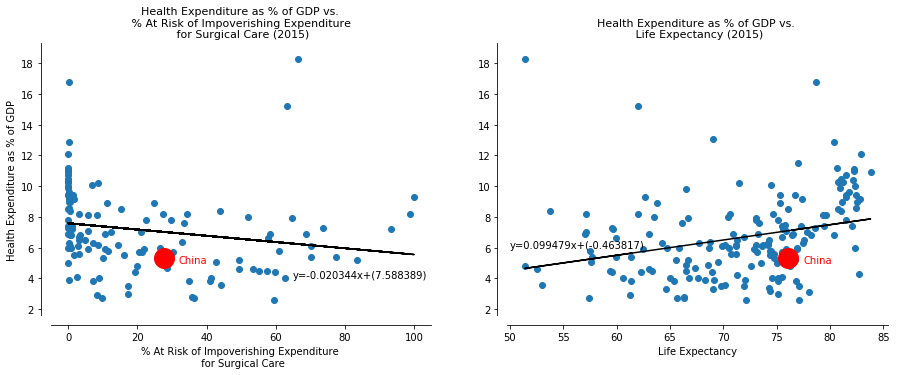

In [491]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,5))

x_1 = combo_risk['risk_impov']
y_1 = combo_risk['expenditure_GDP']
ax1.scatter(x_1,y_1)

z = np.polyfit(x_1,y_1,1)
p = np.poly1d(z)
ax1.plot(x_1,p(x_1),color="black")
ax1.plot(x_1[25],y_1[25],'ro',markersize=20)
ax1.text(32,5,"China",color="r")
ax1.text(65,4, "y=%.6fx+(%.6f)"%(z[0],z[1]))

x_2 = combo_life['life_expec']
y_2 = combo_life['expenditure_GDP']
ax2.scatter(x_2,y_2)

z = np.polyfit(x_2,y_2,1)
p = np.poly1d(z)
ax2.plot(x_2,p(x_2),color="black")
ax2.plot(x_2[3],y_2[3],'ro',markersize=20)
ax2.text(77.5,5,"China",color="r")
ax2.text(50,6,"y=%.6fx+(%.6f)"%(z[0],z[1]))

ax1.set_title('Health Expenditure as % of GDP vs. \n % At Risk of Impoverishing Expenditure \n for Surgical Care (2015)',fontsize='11')
ax1.set_ylabel('Health Expenditure as % of GDP')
ax1.set_xlabel('% At Risk of Impoverishing Expenditure \n for Surgical Care')
ax2.set_title('Health Expenditure as % of GDP vs. \n Life Expectancy (2015)',fontsize='11')
ax2.set_xlabel('Life Expectancy')

ax1.spines['left'].set_position(('outward',10))
ax1.spines['bottom'].set_position(('outward',10))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax2.spines['left'].set_position(('outward',10))
ax2.spines['bottom'].set_position(('outward',10))
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

#### Check comps:

In [492]:
combo_life[combo_life['Country Name'].isin(country_comps)]

,Country Name,life_expec,expenditure_GDP
1,Australia,82.400000,9.4
3,China,76.092000,5.3
4,France,82.273171,11.1
5,Germany,80.641463,11.2
8,Italy,82.543902,9.0
17,United Kingdom,80.956098,9.9
18,United States,78.690244,16.8
47,Canada,82.129024,10.4


#### Correlations:

In [493]:
np.corrcoef(x_1,y_1)

array([[ 1.        , -0.19439565],
       [-0.19439565,  1.        ]])

In [494]:
np.corrcoef(x_2,y_2)

array([[1.        , 0.28644655],
       [0.28644655, 1.        ]])